# **Fashion MNIST PROJECT**

**Used Fashion MNIST dataset from keras**

##**Importing required libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **Loading data**

### **Data Description**
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. 
The classes are:

Label	Description:

{
0: T-shirt/top,

1: Trouser,

2: Pullover,

3: Dress,

4: Coat,

5: Sandal,

6: Shirt,

7: Sneaker,

8: Bag,

9: Ankle boot}

Returns:
  Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

**x_train**: uint8 NumPy array of grayscale image data with shapes
  (60000, 28, 28), containing the training data.

**y_train**: uint8 NumPy array of labels (integers in range 0-9)
  with shape (60000,) for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data.

**y_test**: uint8 NumPy array of labels (integers in range 0-9)
  with shape (10000,) for the test data.


In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#defining class labels for the images
class_label=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

**Checking Random Images**

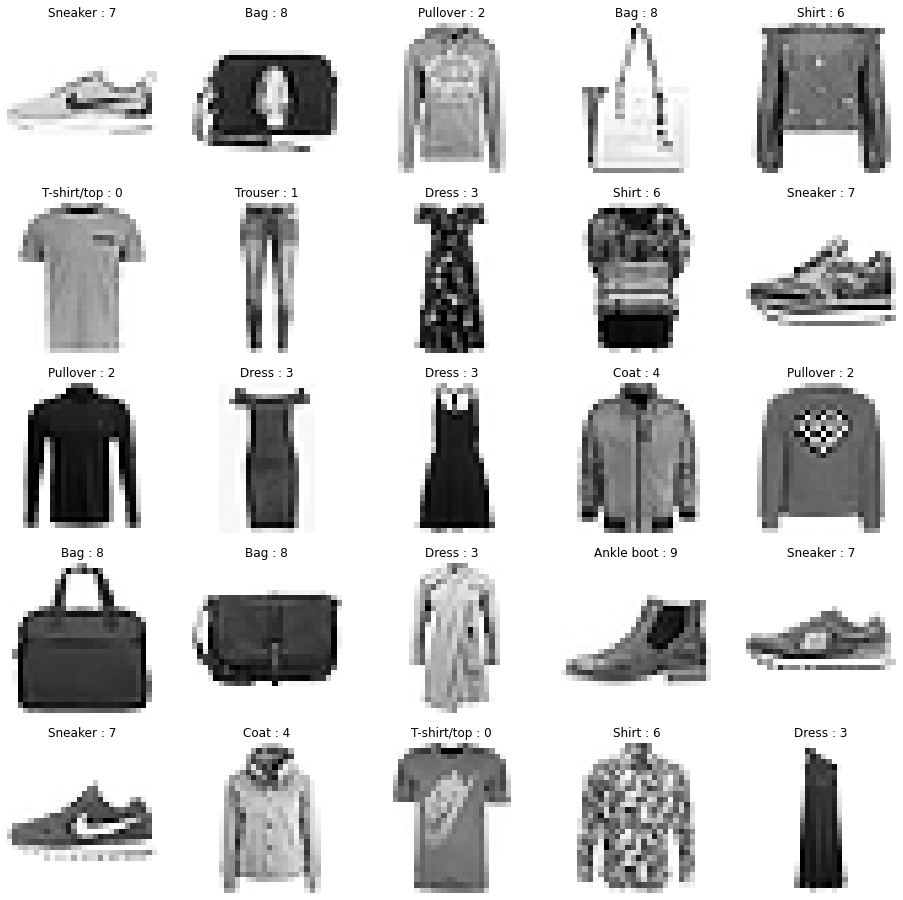

In [ ]:
plt.figure(figsize=(16,16))

c=1
for i in np.random.randint(0,10000,25):
  plt.subplot(5,5,c)
  c+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis("off")
  plt.title("{} : {}".format(class_label[y_train[i]],y_train[i]))

## **Feature Normalization**
First expanding the dimensions of the images from 3 dimensions to 4 dimensions to fit the CNN then normalizing the images by dividing by 255.0

In [ ]:
#dimension expansion
print("Before Expanding the dimensions",X_train.shape, X_test.shape)

X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

print("After Expanding the dimensions",X_train.shape, X_test.shape)

Before Expanding the dimensions (60000, 28, 28) (10000, 28, 28)
After Expanding the dimensions (60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#feature scaling
X_train=X_train/255.0
X_test=X_test/255.0

## **Splitting into Validation Data**
Split the training data into validation and train data. 20% of the training images will be used as validation data,i.e 12000 images for validation, 48000 for training and 10000 imagest for test. Each Image Class will have equal representation during splitting.

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=21,stratify=y_train)
print("After Splitting\nX_train & y_train",X_train.shape,y_train.shape)
print("X_val & y_val",X_val.shape,y_val.shape)
print("X_test & y_test",X_test.shape,y_test.shape)

After Splitting
X_train & y_train (48000, 28, 28, 1) (48000,)
X_val & y_val (12000, 28, 28, 1) (12000,)
X_test & y_test (10000, 28, 28, 1) (10000,)


## **CNN for Image Classification**

In [ ]:
#making the model function
def my_model():
    inputs = keras.Input(shape=(28, 28, 1))

    x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=regularizers.l2(0.01),)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=regularizers.l2(0.01),)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=regularizers.l2(0.01),)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", kernel_regularizer=regularizers.l2(0.01),)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)

    x = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01),)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01),)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01),)(x)
    #x = layers.Dropout(0.5)(x)

    x = layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01),)(x)
    #x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10,activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model = my_model()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4),
    metrics=["accuracy"],
)
print(model.summary())
model.fit(X_train, y_train, batch_size=64, epochs=35, verbose=1,validation_data=(X_val,y_val))
model.evaluate(X_val, y_val, batch_size=64, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
tf.nn.relu_26 (TFOpLambda)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_27 (Batc (None, 14, 14, 64)        256 

[0.5141129493713379, 0.9015833139419556]

In [ ]:
print("Test Data accuracy:")
model.evaluate(X_test, y_test, batch_size=64, verbose=2)

Test Data accuracy:
157/157 - 0s - loss: 0.5329 - accuracy: 0.8971


[0.5328837633132935, 0.8970999717712402]

**This is a generalized model, since the difference between Training, Validation and Test accuracy is not much.**

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.96, 0.01, 0.02]], dtype=float32)

## **Analyzing Test Results**


**Confusion Matrix**

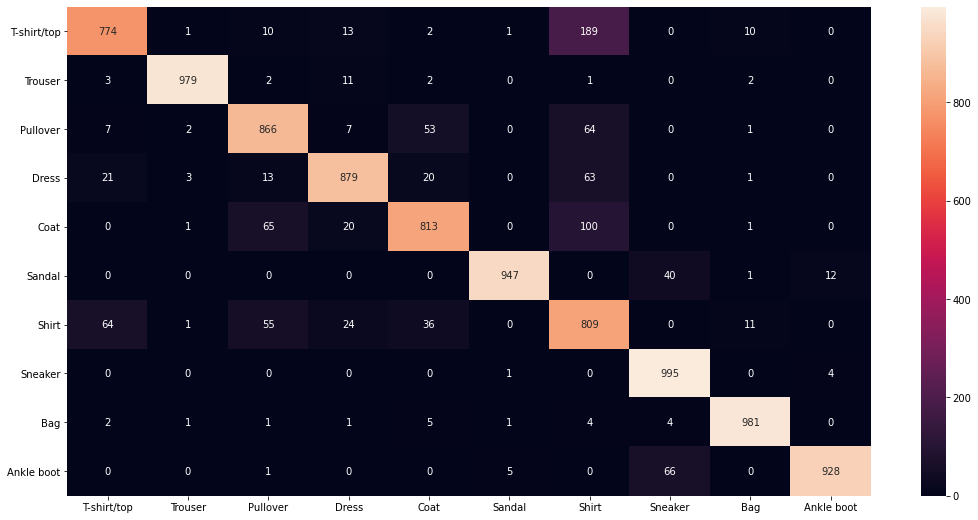

In [ ]:
#finding labels from predicted matrix
y_pred_label=[]
for i in y_pred:
  y_pred_label.append(np.argmax(i))

plt.figure(figsize=(18,9))

conf_mat=confusion_matrix(y_test,y_pred_label)

#plotting heatmap of confusion matrix
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=class_label,yticklabels=class_label)


**Classification Report**

In [ ]:
class_report=classification_report(y_test,y_pred_label,target_names=class_label)
print(class_report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.77      0.83      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.87      0.81      0.84      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.66      0.81      0.73      1000
     Sneaker       0.90      0.99      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.93      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# **Saving Model**

In [ ]:
model.save("Fashion_MNIST_Project_Model.h5")

In [ ]:
deploy_model=keras.models.load_model("Fashion_MNIST_Project_Model.h5")

In [ ]:
y_pred=deploy_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.96, 0.01, 0.02]], dtype=float32)

# **Deploy Model**

In [ ]:
!pip install -U ipykernel

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 7.9 MB 8.0 MB/s 
     |████████████████████████████████| 111 kB 53.3 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 170 kB 74.2 MB/s 
     |████████████████████████████████| 4.2 MB 35.4 MB/s 
     |████████████████████████████████| 122 kB 74.7 MB/s 
     |████████████████████████████████| 786 kB 51.4 MB/s 
     |████████████████████████████████| 368 kB 58.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.25.0 which is incompatibl

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 745 kB 7.0 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-py3-none-any.whl size=19262 sha256=1e8e1531c5e74fdcf02664c9da12f2308e688edf190c9edcd54c25b05d12b48a
  Stored in directory: /root/.cache/pip/wheels/1b/f7/72/35c95a53d15b91dd00df6cf1304d49a31ec5ed6f954c2d4e32
Successfully built pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
class_label=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('Fashion_MNIST_Project_Model.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Fashion Classification
         """
         )

file = st.file_uploader("Please upload a Fashion Image file", type=["jpg", "png","jpeg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (28,28)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        img_reshape=np.expand_dims(img,-1)
        img_reshape=np.expand_dims(img,0)
        #img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape).round(2)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    st.write(np.argmax(predictions))
    st.write(predictions[0,np.argmax(predictions)])
    st.write(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_label[np.argmax(predictions)], 100 * predictions[0,np.argmax(predictions)])
)

Overwriting app.py


In [ ]:
!ngrok authtoken ##Enter Your token here

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!streamlit run --server.port 80 app.py >/dev/null

2021-07-25 22:13:18.663154: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-25 22:13:20.514908: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-25 22:13:20.526873: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-25 22:13:20.526931: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (50393e92481f): /proc/driver/nvidia/version does not exist


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

<NgrokTunnel: "http://ee43cc5e1637.ngrok.io" -> "http://localhost:80">

## **Or try the below code if above doesn't work**

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-07-25 22:31:00--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.45.38.23, 3.223.240.69, 34.228.108.156, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.45.38.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  17.6MB/s    in 0.8s    

2021-07-25 22:31:01 (17.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://4b2d24eca0c6.ngrok.io


In [ ]:
!streamlit run /content/app.py

2021-07-25 22:32:19.833036: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8503
  External URL: http://34.83.39.210:8503

2021-07-25 22:32:21.615297: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-25 22:32:21.627158: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-25 22:32:21.627207: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (50393e92481f): /proc/driver/nvidia/version does not exist
